In [1]:
# display inline plots
%matplotlib inline

# import libraries for numerical and scientific computing
import numpy as np
import scipy as sp

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import pandas for data wrangling and munging
import pandas as pd

# set some options for better view
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# import plotting library built on top of matplotlib
import seaborn as sns

# set some settings related to style of plots that will render
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load training and test examples

loan_train = pd.read_csv('./data/train_u6lujuX.csv', index_col='Loan_ID')
loan_test = pd.read_csv('./data/test_Y3wMUE5.csv', index_col='Loan_ID')

In [3]:
# take a sneak peak at some of the examples
loan_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y


In [4]:
# number of training examples
print 'Number of training examples {0} '.format(loan_train.shape[0])

Number of training examples 614 


In [5]:
# number of test examples
print 'Number of test examples {0} '.format(loan_test.shape[0])

Number of test examples 367 


In [6]:
# class distribution
loan_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

** Most of the applications for loan were accepted. **

## Missing values

In [7]:
loan_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

** There are many features with missing values **

## Importing external scripts

In [8]:
%run scripts/helper.py
%run scripts/model.py
%run scripts/data.py

## Mapping Ordinal Features

In [9]:
loan_train['Gender'] = (loan_train.Gender=='Female')*1
loan_test['Gender'] = (loan_test.Gender=='Female')*1

In [10]:
loan_train['Married'] = (loan_train.Married=='No')*1
loan_test['Married'] = (loan_test.Married=='No')*1

In [11]:
loan_train['Self_Employed'] = (loan_train.Self_Employed=='Yes')*1
loan_test['Self_Employed'] = (loan_test.Self_Employed=='Yes')*1

In [12]:
education_mapping = {'Graduate': 1, 'Not Graduate': 2}

loan_train['Education'] = loan_train.Education.map(education_mapping)
loan_test['Education'] = loan_test.Education.map(education_mapping)

In [13]:
property_area_mapping = {'Urban': 1, 'Rural': 2, 'Semiurban': 3}

loan_train['Property_Area'] = loan_train.Property_Area.map(property_area_mapping)
loan_test['Property_Area'] = loan_test.Property_Area.map(property_area_mapping)

## Filling Missing values

In [14]:
loan_train['LoanAmount'] = loan_train.LoanAmount.fillna(loan_train.LoanAmount.mean())
loan_test['LoanAmount'] = loan_test.LoanAmount.fillna(loan_test.LoanAmount.mean())

In [15]:
loan_train['Loan_Amount_Term'] = loan_train.Loan_Amount_Term.fillna(loan_train.Loan_Amount_Term.mean())
loan_test['Loan_Amount_Term'] = loan_test.Loan_Amount_Term.fillna(loan_test.Loan_Amount_Term.mean())

In [16]:
loan_train['Credit_History'] = loan_train.Credit_History.fillna(1)
loan_test['Credit_History'] = loan_test.Credit_History.fillna(1)

## Histogram of Applicant's Income

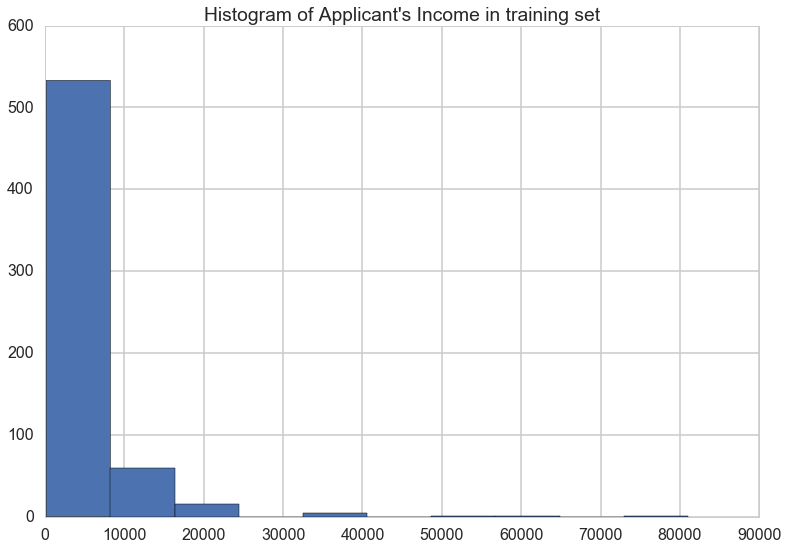

In [17]:
loan_train.ApplicantIncome.hist()
plt.title('Histogram of Applicant\'s Income in training set');

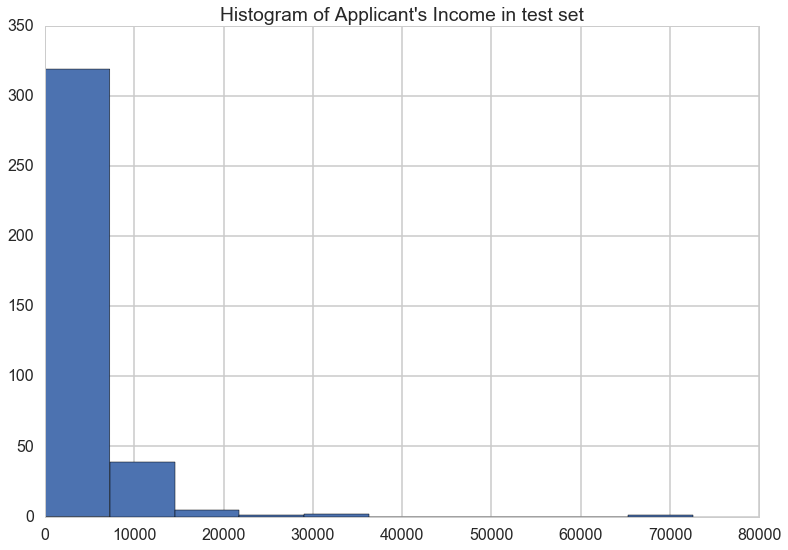

In [18]:
loan_test.ApplicantIncome.hist()
plt.title('Histogram of Applicant\'s Income in test set');

** Heavy tail is evident, it will be benefited from log transformation **

In [19]:
loan_train['ApplicantIncome'] = np.log10(loan_train.ApplicantIncome + 1)
loan_test['ApplicantIncome'] = np.log10(loan_test.ApplicantIncome + 1)

## Histogram of co-applicant's income

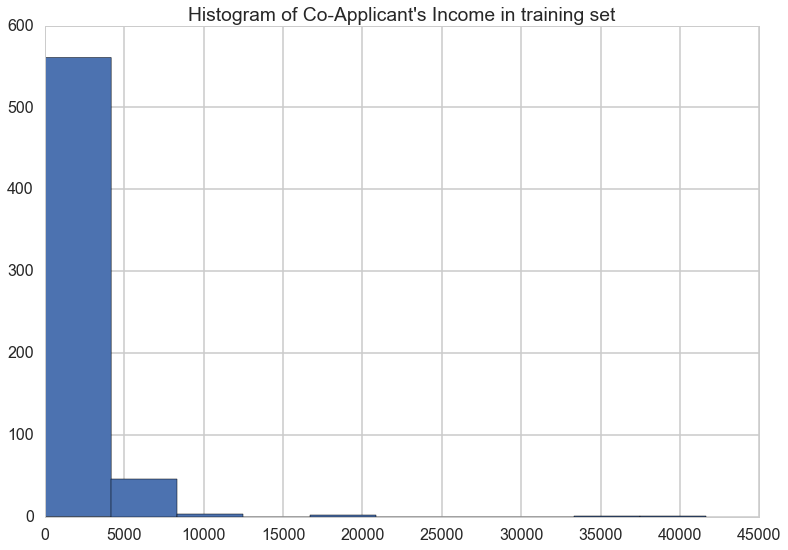

In [20]:
loan_train.CoapplicantIncome.hist()
plt.title('Histogram of Co-Applicant\'s Income in training set');

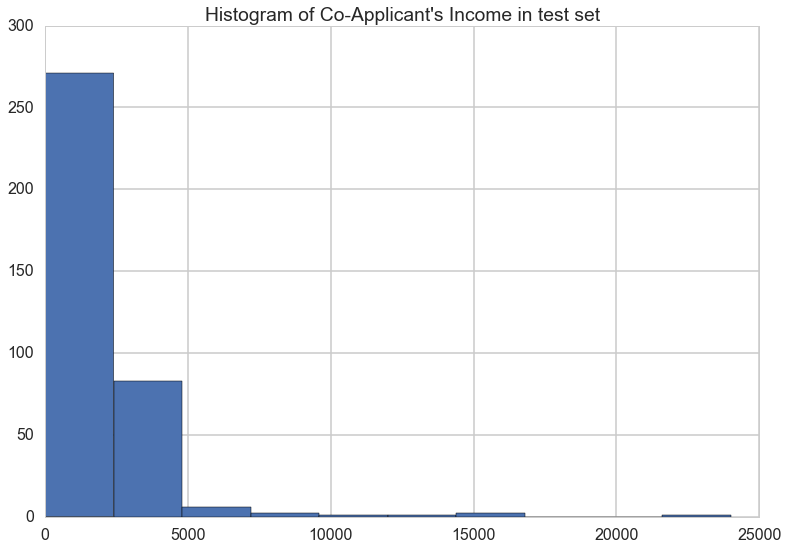

In [21]:
loan_test.CoapplicantIncome.hist()
plt.title('Histogram of Co-Applicant\'s Income in test set');

In [22]:
loan_train['CoapplicantIncome'] = np.log10(loan_train.CoapplicantIncome + 1)
loan_test['CoapplicantIncome'] = np.log10(loan_test.CoapplicantIncome + 1)

In [23]:
loan_train['LoanAmount'] = np.log10(loan_train.LoanAmount + 1)
loan_test['LoanAmount'] = np.log10(loan_test.LoanAmount + 1)

In [24]:
loan_train['Loan_Amount_Term'] = np.log10(loan_train.Loan_Amount_Term + 1)
loan_test['Loan_Amount_Term'] = np.log10(loan_test.Loan_Amount_Term + 1)

## Prepare dataset

In [25]:
features = loan_train.columns.drop(['Dependents', 'Loan_Status'])

train_target = loan_train.Loan_Status
loan_train = loan_train[features]

loan_test = loan_test[features]

## Partition a dataset into training and test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(loan_train, train_target, test_size=0.2, random_state=0)

In [27]:
print X_train.shape, X_test.shape

(491, 10) (123, 10)


## Bringing features on the same scale

In [28]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Selecting meaningful features

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print 'Training accuracy:', lr.score(X_train_std, y_train)
print 'Test accuracy:', lr.score(X_test_std, y_test)

Training accuracy: 0.804480651731
Test accuracy: 0.829268292683


In [30]:
lr.intercept_

array([ 0.62044823])

In [31]:
lr.coef_[0]

array([ 0.        , -0.04518008, -0.03779522,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.18770999,  0.07881429])

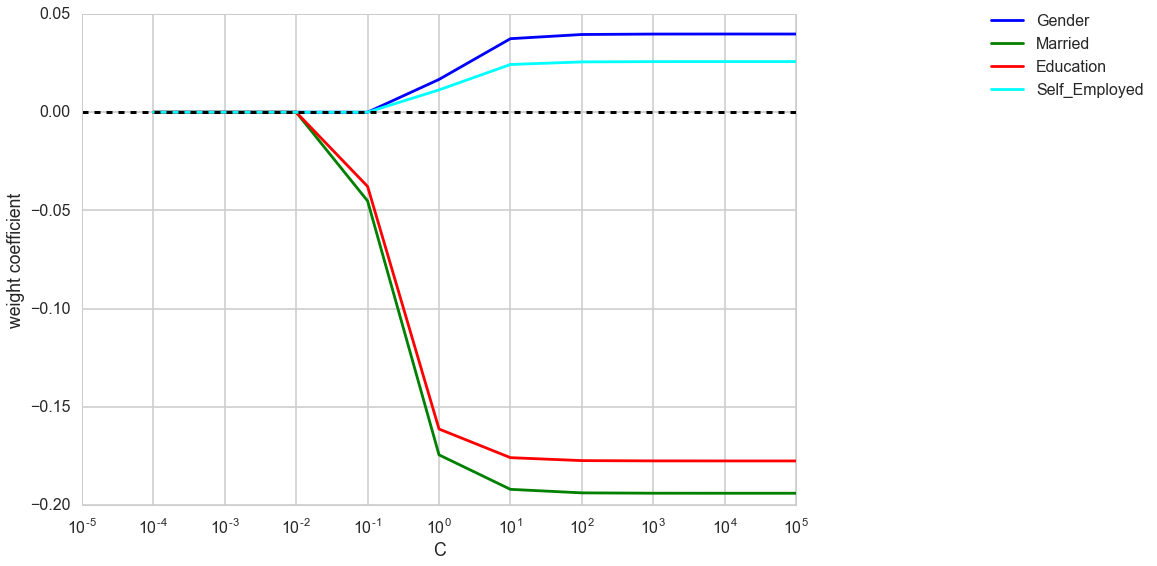

In [32]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=loan_train.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [33]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

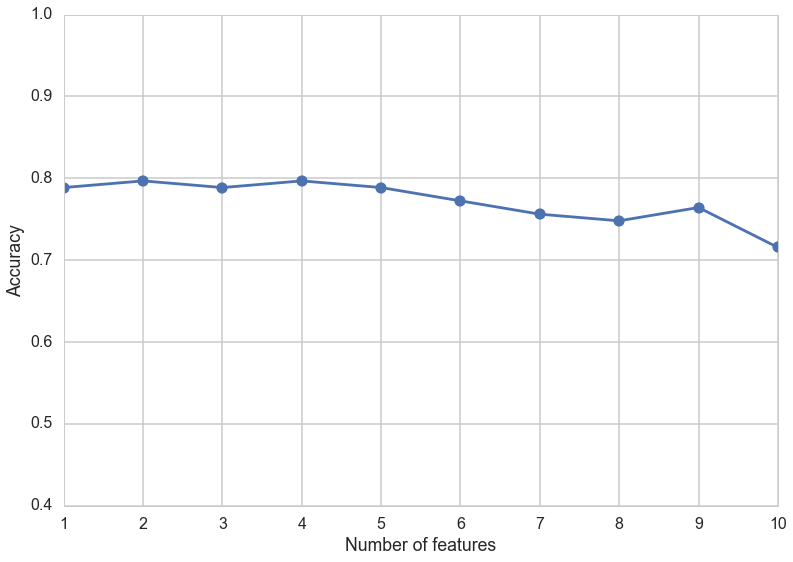

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

rf = RandomForestClassifier()

# selecting features
sbs = SBS(rf, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.4, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show();

In [187]:
k2 = list(sbs.subsets_[8])
print loan_train.columns[k2]

Index([u'Loan_Amount_Term', u'Credit_History'], dtype='object')


In [184]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.86150712830957232)
('Test accuracy:', 0.73170731707317072)


In [185]:
gbc.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', gbc.score(X_train_std[:, k5], y_train))
print('Test accuracy:', gbc.score(X_test_std[:, k5], y_test))

('Training accuracy:', 0.81262729124236255)
('Test accuracy:', 0.81300813008130079)


## Assesing Feature Importance with Random Forests

 1) Credit_History                 0.266003
 2) ApplicantIncome                0.224651
 3) LoanAmount                     0.205484
 4) CoapplicantIncome              0.121433
 5) Property_Area                  0.050427
 6) Loan_Amount_Term               0.043221
 7) Married                        0.026753
 8) Education                      0.023485
 9) Self_Employed                  0.020507
10) Gender                         0.018037


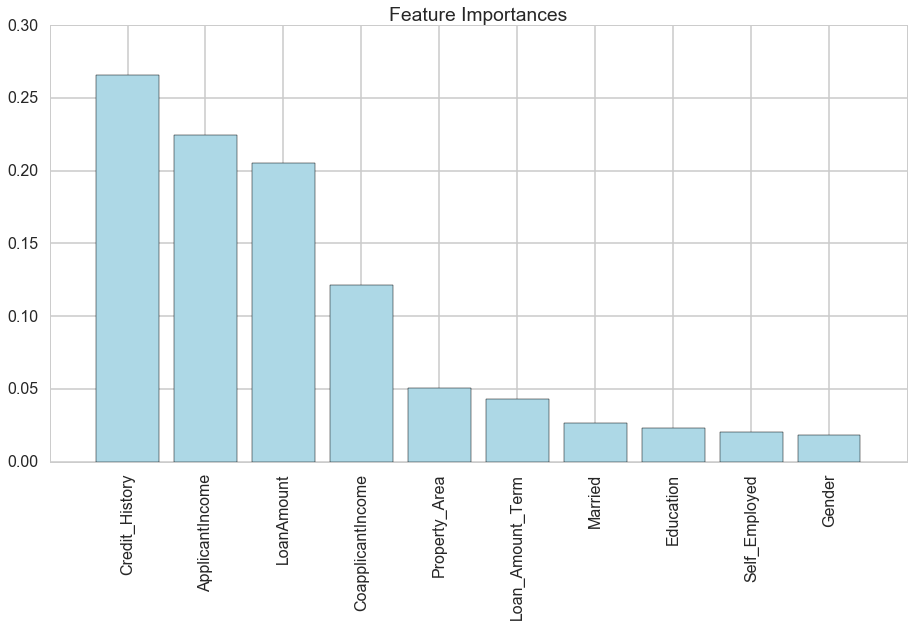

In [38]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = loan_train.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [39]:
feat = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5, min_weight_fraction_leaf=.1)
forest.fit(X_train[feat], y_train)

print('Training accuracy:', forest.score(X_train[feat], y_train))
print('Test accuracy:', forest.score(X_test[feat], y_test))

('Training accuracy:', 0.8044806517311609)
('Test accuracy:', 0.82926829268292679)


## Assessing model performance

In [40]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

y_train_bin = (y_train=='Y')*1
scores = []
for k, (train, test) in enumerate(kfold):
    knn.fit(X_train.values[train], y_train_bin.values[train])
    score = knn.score(X_train.values[test], y_train_bin.values[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train_bin.values[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [143 298], Acc: 0.780
Fold: 2, Class dist.: [143 298], Acc: 0.820
Fold: 3, Class dist.: [143 299], Acc: 0.776
Fold: 4, Class dist.: [143 299], Acc: 0.714
Fold: 5, Class dist.: [143 299], Acc: 0.694
Fold: 6, Class dist.: [143 299], Acc: 0.755
Fold: 7, Class dist.: [143 299], Acc: 0.694
Fold: 8, Class dist.: [143 299], Acc: 0.755
Fold: 9, Class dist.: [143 299], Acc: 0.796
Fold: 10, Class dist.: [144 299], Acc: 0.812

CV accuracy: 0.760 +/- 0.044


## Debugging algorithms with learning curves

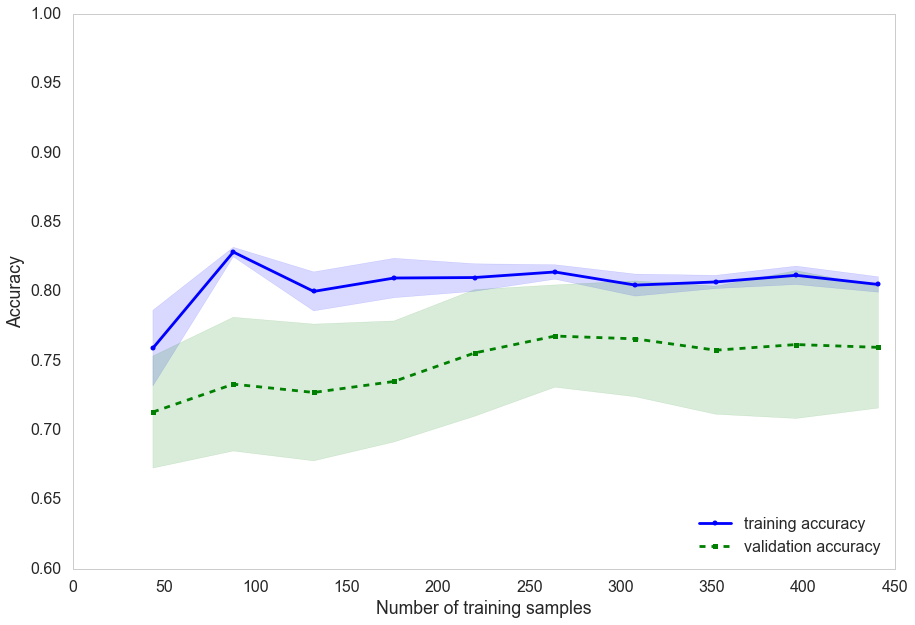

In [41]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

## Validation Curves

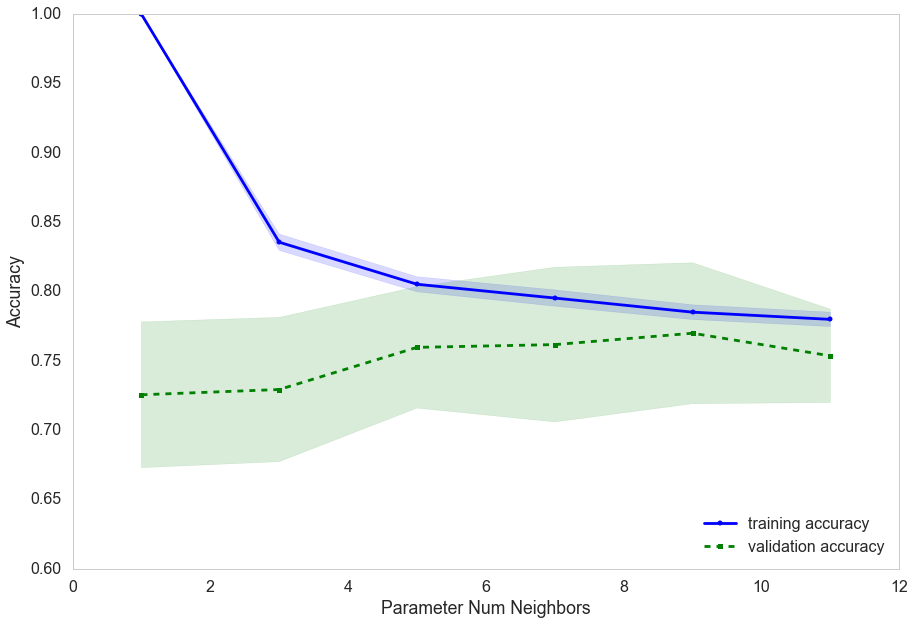

In [44]:
from sklearn.learning_curve import validation_curve

param_range = [1, 3, 5, 7, 9, 11]
train_scores, test_scores = validation_curve(
                estimator=knn, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter Num Neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

## Performance against different evaluation metrics

In [173]:
from sklearn.metrics import confusion_matrix

gbc.fit(X_train_std, y_train)
y_pred = gbc.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print confmat

[[15 18]
 [ 5 85]]


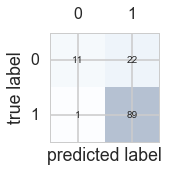

In [46]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

## Optimizing precision and recall of a classification model

In [49]:
y_pred_bin = (y_pred=='Y')*1
y_test_bin = (y_test=='Y')*1

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test_bin, y_pred=y_pred_bin))
print('Recall: %.3f' % recall_score(y_true=y_test_bin, y_pred=y_pred_bin))
print('F1: %.3f' % f1_score(y_true=y_test_bin, y_pred=y_pred_bin))

Precision: 0.802
Recall: 0.989
F1: 0.886


## Plotting a Receiver Operating Characteristic

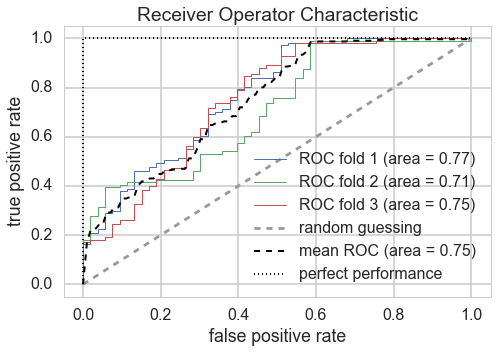

In [64]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

X_train2 = X_train.values

cv = StratifiedKFold(y_train, n_folds=3, random_state=1)

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = forest.fit(X_train2[train], 
                         y_train_bin[train]).predict_proba(X_train2[test])
    
    fpr, tpr, thresholds = roc_curve(y_train[test], 
                                     probas[:, 1], 
                                     pos_label='Y')
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label='ROC fold %d (area = %0.2f)' 
                    % (i+1, roc_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

## Analyzing Errors

In [149]:
probs = knn.predict_proba(X_test)
y_pred_custom = custom_threshold(probs[:, 1], 0.60)

In [150]:
error_df = X_test.copy()

error_df['true_label'] = y_test
error_df['predicted_label'] = y_pred_custom

error_df['predicted_label_negative_prob'] = probs[:, 0]
error_df['predicted_label_positive_prob'] = probs[:, 1]

errors = error_df[error_df.true_label != error_df.predicted_label]

In [151]:
errors.shape

(15, 14)

## Custom Threshold

In [89]:
def custom_threshold(preds, threshold=0.5):
    return ['Y' if pred > threshold else 'N' for pred in preds]

## Model Building

In [152]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(loan_train, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=9, p=2, weights='uniform')

In [153]:
predictions_knn_probs = knn.predict_proba(loan_test)

In [154]:
predictions_knn_threshold = custom_threshold(predictions_knn_probs[:, 1], 0.60)

In [155]:
forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5)
forest.fit(loan_train, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
predictions_forest_probs = forest.predict_proba(loan_test)

In [157]:
predictions_forest_threshold = custom_threshold(predictions_knn_probs[:, 1], 0.50)

In [158]:
forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='gini', min_samples_leaf=5)
forest.fit(loan_train, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
predictions_forest_gini_probs = forest.predict_proba(loan_test)

In [160]:
predictions_forest_gini_threshold = custom_threshold(predictions_forest_gini_probs[:, 1], 0.50)

## Majority Voting

In [161]:
from collections import Counter
import numpy as np

def majority_voting(preds):
    """
    Given an array of predictions from various classifiers
    return single array with ensemble of predictions based on
    simple majority voting
    
    Input: list of list [[y1, y2, y3, ..], [y1, y2, y3, ...], ..] 
    Output: final prediction [y1, y2, y3, ..]
    """
    length = [len(pred) for pred in preds]
    
    if len(set(length)) != 1:
        raise ValueError('Predictions must be of the same length')
    
    pred_matrix = np.matrix(preds)
    ensemble_preds = []
    
    for i in range(len(preds[0])):
        pred_column = np.array(pred_matrix[:, i]).ravel()
        common_pred = Counter(pred_column)
        most_common = common_pred.most_common()[0][0]
        
        ensemble_preds.append(most_common)
    
    return ensemble_preds

In [162]:
ensemble_preds = majority_voting([predictions_knn_threshold, predictions_forest_threshold, predictions_forest_gini_threshold])

In [163]:
create_submissions(loan_test.index.values, ensemble_preds, 'ensemble_preds_threshold.csv')